In [3]:
1 #Importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

2 #Load the Laptops Price Prediction Dataset
df=pd.read_csv('/content/data (1).csv')
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


In [4]:
3 # Finding missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64


In [5]:
4 # Replace missing values with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


In [7]:
5 # Check the outlier
# Box plots for detecting outliers
import pandas as pd
df = pd.read_csv("/content/data (1).csv")

# 1. Drop columns with more than 40% missing values
threshold = 0.4  # 40% threshold
df = df.dropna(thresh=len(df) * threshold, axis=1)

# 2. Drop rows with more than 30% missing values
row_threshold = 0.3  # 30% threshold
df = df.dropna(thresh=len(df.columns) * row_threshold, axis=0)

# 3. Remove duplicate rows
df = df.drop_duplicates()

# Display the cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [8]:
6 # Drop the outliers
import pandas as pd
import numpy as np
df = pd.read_csv("/content/data (1).csv")
numerical_cols = df.select_dtypes(include=[np.number])
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where any numerical column contains an outlier
df_filtered = df[~((numerical_cols < lower_bound) | (numerical_cols > upper_bound)).any(axis=1)]
print(df_filtered)
print("Outliers removed successfully.")

     Unnamed: 0.1  Unnamed: 0 brand  \
0               0           0    HP   
1               1           1    HP   
2               2           2  Acer   
5               5           5  Acer   
6               6           6  Dell   
..            ...         ...   ...   
885           923        1012  Dell   
886           924        1013  Acer   
887           925        1014  Acer   
888           926        1015  Asus   
891           929        1018  Asus   

                                                  name   price  spec_rating  \
0                     Victus 15-fb0157AX Gaming Laptop   49900    73.000000   
1                                  15s-fq5007TU Laptop   39900    60.000000   
2                                 One 14 Z8-415 Laptop   26990    69.323529   
5                              Extensa EX214-53 Laptop   39990    62.000000   
6                    Inspiron 3520 D560896WIN9B Laptop   36790    60.000000   
..                                                 ...   

In [10]:
7 #Perform label encoding
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col]) # Indented this line by 4 spaces
print(df)
print("Label encoding applied.")

     Unnamed: 0.1  Unnamed: 0  brand  name   price  spec_rating  processor  \
0               0           0      9   647   49900    73.000000        105   
1               1           1      9    38   39900    60.000000         34   
2               2           2      1   440   26990    69.323529         15   
3               3           3     14   784   59729    66.000000         39   
4               4           4      2   378   69990    69.323529        160   
..            ...         ...    ...   ...     ...          ...        ...   
888           926        1015      3   697   44990    69.323529         80   
889           927        1016      3   528  110000    71.000000        122   
890           928        1017      3   506  189990    89.000000        143   
891           929        1018      3   534  129990    73.000000         73   
892           930        1019      3   530  131990    84.000000        143   

     CPU  Ram  Ram_type  ROM  ROM_type  GPU  display_size  reso

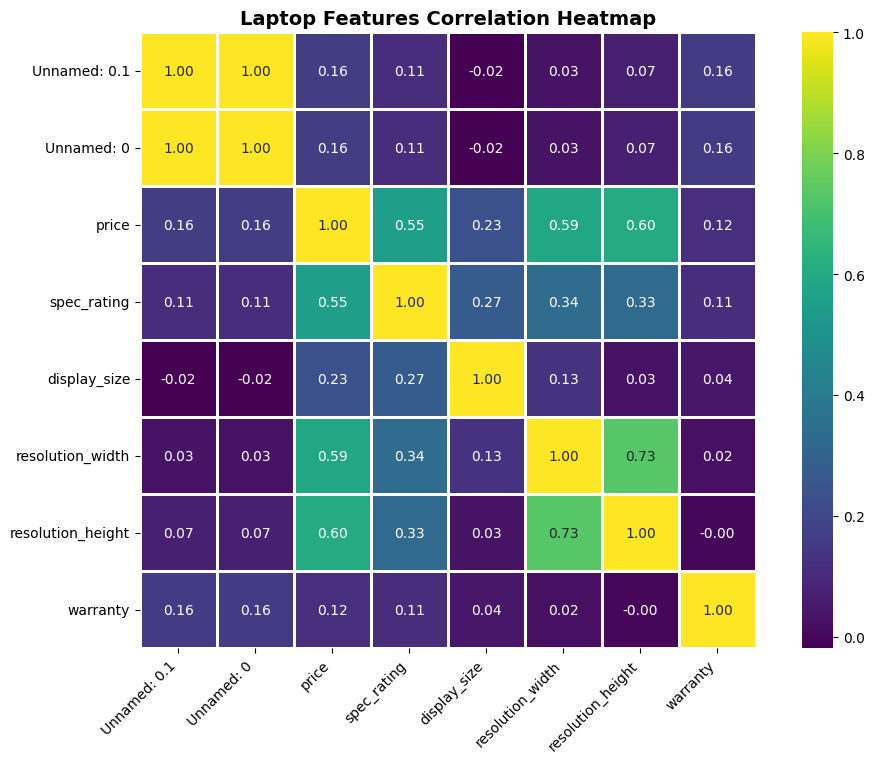

In [12]:
8 #Check correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/data (1).csv")
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=1, square=True, cbar=True)
plt.title("Laptop Features Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
# Show the heatmap
plt.show()

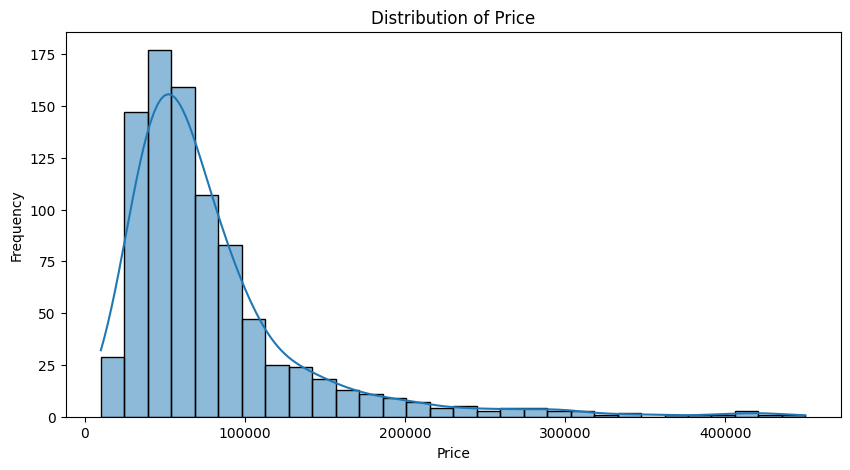

In [16]:
9 #Check outcome proportionality
X_column = 'spec_rating'
y_column = 'price'
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [18]:
10 #Separate independent and target variables
import pandas as pd
df = pd.read_csv("/content/data (1).csv")
target_column = "price"  # Ensure this column exists in the dataset
y = df[target_column] if target_column in df.columns else None
X = df.drop(columns=[target_column]) if y is not None else df.copy()
print("Independent Variables (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head() if y is not None else "Target variable not found!")

Independent Variables (X):
   Unnamed: 0.1  Unnamed: 0   brand                                  name  \
0             0           0      HP      Victus 15-fb0157AX Gaming Laptop   
1             1           1      HP                   15s-fq5007TU Laptop   
2             2           2    Acer                  One 14 Z8-415 Laptop   
3             3           3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop   
4             4           4   Apple       MacBook Air 2020 MGND3HN Laptop   

   spec_rating                      processor                             CPU  \
0    73.000000      5th Gen AMD Ryzen 5 5600H           Hexa Core, 12 Threads   
1    60.000000   12th Gen Intel Core i3 1215U  Hexa Core (2P + 4E), 8 Threads   
2    69.323529  11th Gen Intel Core i3 1115G4            Dual Core, 4 Threads   
3    66.000000   12th Gen Intel Core i5 1240P  12 Cores (4P + 8E), 16 Threads   
4    69.323529                       Apple M1             Octa Core (4P + 4E)   

    Ram Ram_type    ROM

In [20]:
11 #Apply normalization and standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]

# Normalization (Min-Max Scaling)
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df_numerical), columns=df_numerical.columns, index=df.index)
print("\nNormalized Data (First 5 Rows):\n", df_normalized.head())

# Standardization (Z-score Scaling)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df.index)
print("\nStandardized Data (First 5 Rows):\n", df_standardized.head())


Normalized Data (First 5 Rows):
    Unnamed: 0.1  Unnamed: 0     price  spec_rating  display_size  \
0      0.000000    0.000000  0.090676     0.448276      0.625000   
1      0.001075    0.000981  0.067951     0.000000      0.625000   
2      0.002151    0.001963  0.038612     0.321501      0.375000   
3      0.003226    0.002944  0.113012     0.206897      0.375000   
4      0.004301    0.003925  0.136331     0.321501      0.265625   

   resolution_width  resolution_height  warranty  
0          0.304348           0.116071  0.333333  
1          0.304348           0.116071  0.333333  
2          0.304348           0.116071  0.333333  
3          0.420290           0.235119  0.333333  
4          0.536232           0.309524  0.333333  

Standardized Data (First 5 Rows):
    Unnamed: 0.1  Unnamed: 0     price  spec_rating  display_size  \
0     -1.729757   -1.739401 -0.493170     0.653788      0.454147   
1     -1.726054   -1.736065 -0.657520    -1.693439      0.454147   
2     -1.72

In [25]:
12 # Implement the linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Implement the linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df[['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'spec_rating', 'processor',
       'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty']]
y = df['price']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['brand', 'name', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
X = X.drop(columns=categorical_cols)
X = pd.concat([X, encoded_df], axis=1)
